<a href="https://colab.research.google.com/github/beitezhu/machinelearning/blob/main/Nasdaq_Stock_analysis_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
data =pd.read_csv('NasdaqReturns.csv')

In [ ]:
data

,StockSymbol,Industry,SubIndustry,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,...,Ret2009.03,Ret2009.04,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12
0,AAON,Industrial Goods,General Building Materials,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,...,0.185088,0.100565,0.067762,-0.045062,-0.025832,0.060976,-0.039234,-0.101297,0.041804,0.019885
1,AAPL,Consumer Goods,Electronic Equipment,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,...,0.192919,0.208858,0.079571,0.043673,0.138606,0.018159,0.103339,0.016995,0.053267,0.041980
2,ABAX,Healthcare,Diagnostic Substances,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,...,0.111541,-0.119907,0.162126,0.161108,0.304581,0.001883,0.014026,-0.141783,-0.024740,0.134043
3,ABCB,Financial,Regional,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,...,-0.024845,0.402570,-0.039816,-0.020155,0.004651,0.007812,0.122449,-0.170423,0.105351,0.062315
4,ABFS,Services,Trucking,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,...,0.113583,0.227007,0.216357,-0.075114,0.069471,0.112273,-0.052831,-0.127703,-0.047582,0.191981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,ZION,Financial,Regional,0.006983,-0.098845,-0.178931,-0.059170,0.125241,-0.014390,-0.048913,...,0.080220,0.140919,0.264325,-0.202208,0.158703,0.270115,0.021023,-0.217680,-0.075896,-0.036787
1154,ZOLL,Healthcare,Medical Appliances & Equipment,0.022857,0.350649,-0.026221,-0.141942,0.086957,-0.012694,-0.179192,...,0.045124,0.318033,0.035736,0.134977,-0.056807,-0.029158,0.201563,-0.095903,0.263347,0.071801
1155,ZOLT,Basic Materials,Specialty Chemicals,0.042841,0.156692,-0.142326,-0.123620,-0.107143,0.276276,-0.029206,...,0.229242,0.183735,0.232877,-0.029940,0.011213,-0.078140,0.141304,-0.153042,-0.004435,0.045105
1156,ZRAN,Technology,Semiconductor,-0.270080,0.090909,-0.024935,-0.108214,-0.215000,0.618160,-0.331364,...,0.705426,0.025229,0.258542,-0.011786,0.049180,-0.050687,0.034111,-0.226003,0.052995,0.197183


In [ ]:
# Count the total number of unique companies
total_companies = data['StockSymbol'].nunique()

# Count the number of companies in each industry
companies_per_industry = data.groupby('Industry')['StockSymbol'].nunique()

# Print the total number of companies
print(f"Total number of companies: {total_companies}")

# Print the number of companies in each industry
print("Number of companies in each industry:")
print(companies_per_industry)

Total number of companies: 1158
Number of companies in each industry:
Industry
Basic Materials       50
Conglomerates          2
Consumer Cyclical      2
Consumer Goods        80
Financial            338
Healthcare           111
Industrial Goods      65
Services             202
Technology           296
Utilities             12
Name: StockSymbol, dtype: int64


a 1)Total number of companies: 1158

Number of companies in each industry:
Basic Materials       50
Conglomerates          2
Consumer Cyclical      2
Consumer Goods        80
Financial            338
Healthcare           111
Industrial Goods      65
Services             202
Technology           296
Utilities             12

In [ ]:
# Normalize all column names to lowercase to handle any casing inconsistencies
data.columns = [col.lower() for col in data.columns]

# Select the returns for December 2000
returns_dec_2000 = data['ret2000.12']

# Count the number of stocks with 10% or more increase
stocks_up_10_percent_or_more = (returns_dec_2000 >= 0.10).sum()

# Count the number of stocks with 10% or more decrease
stocks_down_10_percent_or_more = (returns_dec_2000 <= -0.10).sum()

print ('stocks_up_10_percent_or_more=', stocks_up_10_percent_or_more),
print ('stocks_down_10_percent_or_more=',stocks_down_10_percent_or_more)

stocks_up_10_percent_or_more= 309
stocks_down_10_percent_or_more= 261


a ii)
stocks_up_10_percent_or_more= 309

stocks_down_10_percent_or_more= 261

In [ ]:
# Calculate the average return for each industry in October 2008
average_return_oct_2008 = data.groupby('industry')['ret2008.10'].mean()

# Sorting the industries by their average return to find those with the worst returns
worst_performing_industries_oct_2008 = average_return_oct_2008.sort_values()

# Print the sorted industries with their average returns
print(worst_performing_industries_oct_2008)

industry
Conglomerates       -0.265748
Basic Materials     -0.254674
Industrial Goods    -0.233366
Technology          -0.196299
Services            -0.173833
Healthcare          -0.169440
Consumer Goods      -0.155209
Consumer Cyclical   -0.145705
Utilities           -0.120087
Financial           -0.102884
Name: ret2008.10, dtype: float64


a iii) Conglomerates has the worst average retur, -26.57%

b i)
**Similar Scale and Units**: The variables (monthly returns) are all in the same unit and likely on a similar scale since they represent percentage changes in stock prices. When all features are in the same scale, normalization may not be necessary as one variable won’t dominate the others purely due to its scale.


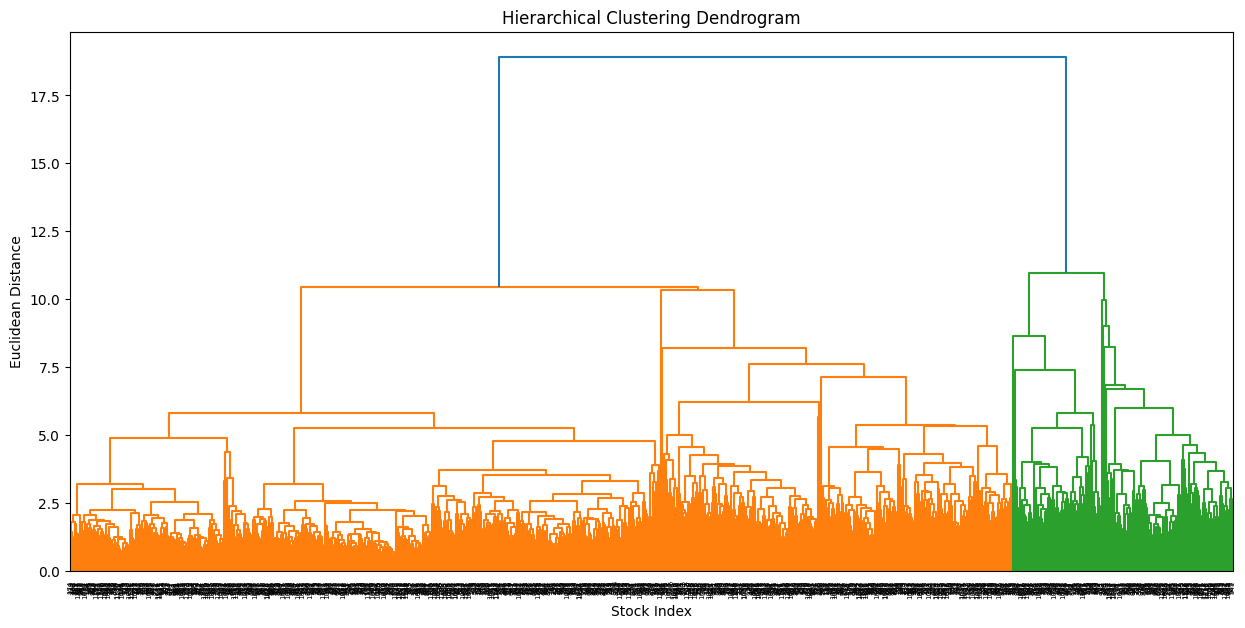

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Extracting the columns for monthly returns from Jan 2000 to Dec 2009
# Assuming the columns are named as 'Ret2000.01', 'Ret2000.02', ..., 'Ret2009.12'
returns_data = data.loc[:, 'ret2000.01':'ret2009.12']

# Performing Hierarchical Clustering
# Using the 'ward' method and Euclidean distance
linked = linkage(returns_data, method='ward', metric='euclidean')

# Plotting the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Stock Index')
plt.ylabel('Euclidean Distance')
plt.show()

b ii)
Based on the sample dendrogram, it's feasible to select between 2 and 12 clusters. Given the extensive size of the dataset, the dendrogram becomes densely populated, making it challenging to discern details clearly. For practical purposes, I have opted to divide the data into 4 distinct clusters, as this choice offers clarity in segmentation.

This approach is consistent with the 'elbow method', a technique where one identifies a point in the dendrogram at which combining clusters results in a substantial increase in their distance (reflected as the height of the linkage). Selecting this number of clusters facilitates the differentiation between distinct groups while avoiding an overly detailed granularity that might be impractical for the intended application.

In [ ]:
from scipy.cluster.hierarchy import cut_tree
cluster_num = 4
data['Cluster']  = cut_tree(linked, n_clusters = 4).flatten()
print(data['Cluster'].value_counts())

0    588
2    351
1    131
3     88
Name: Cluster, dtype: int64


In [ ]:
data.head(5)

,stocksymbol,industry,subindustry,ret2000.01,ret2000.02,ret2000.03,ret2000.04,ret2000.05,ret2000.06,ret2000.07,...,ret2009.04,ret2009.05,ret2009.06,ret2009.07,ret2009.08,ret2009.09,ret2009.10,ret2009.11,ret2009.12,Cluster
0,AAON,Industrial Goods,General Building Materials,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,...,0.100565,0.067762,-0.045062,-0.025832,0.060976,-0.039234,-0.101297,0.041804,0.019885,0
1,AAPL,Consumer Goods,Electronic Equipment,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,...,0.208858,0.079571,0.043673,0.138606,0.018159,0.103339,0.016995,0.053267,0.041980,1
2,ABAX,Healthcare,Diagnostic Substances,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,...,-0.119907,0.162126,0.161108,0.304581,0.001883,0.014026,-0.141783,-0.024740,0.134043,2
3,ABCB,Financial,Regional,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,...,0.402570,-0.039816,-0.020155,0.004651,0.007812,0.122449,-0.170423,0.105351,0.062315,0
4,ABFS,Services,Trucking,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,...,0.227007,0.216357,-0.075114,0.069471,0.112273,-0.052831,-0.127703,-0.047582,0.191981,0


b iii) see below


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Assuming 'linked' is the linkage matrix from the previous hierarchical clustering
# Specify the number of clusters
num_clusters = 4

# Extract the cluster assignments
cluster_assignments = fcluster(linked, num_clusters, criterion='maxclust')

# Add the cluster assignments to the original dataset
data['Cluster'] = cluster_assignments

# Analyze each cluster
for i in range(1, num_clusters + 1):
    cluster_data = data[data['Cluster'] == i]
    num_observations = len(cluster_data)
    industries = cluster_data['industry'].value_counts()
    subindustries = cluster_data['subindustry'].value_counts()

    print(f"Cluster {i}:")
    print(f"Number of observations: {num_observations}")
    print("Industries in the cluster:")
    print(industries)
    print("Subindustries in the cluster:")
    print(subindustries)
    print("\n")


Cluster 1:
Number of observations: 588
Industries in the cluster:
Financial            299
Services             113
Consumer Goods        54
Technology            38
Healthcare            29
Industrial Goods      23
Basic Materials       17
Utilities             11
Conglomerates          2
Consumer Cyclical      2
Name: industry, dtype: int64
Subindustries in the cluster:
Regional                          196
Savings & Loans                    51
Property & Casualty Insurance      16
Trucking                           11
Restaurants                        11
                                 ... 
Printed Circuit Boards              1
Advertising Agencies                1
Oil & Gas Equipment & Services      1
Drugs                               1
Computer Based Systems              1
Name: subindustry, Length: 125, dtype: int64


Cluster 2:
Number of observations: 351
Industries in the cluster:
Technology          101
Services             73
Healthcare           49
Industrial Goods     3

In [ ]:
# Calculate the average returns for each cluster for February and March 2000
february_averages = data.groupby('Cluster')['ret2000.02'].mean()
march_averages = data.groupby('Cluster')['ret2000.03'].mean()

# Display the average returns for each cluster
print("Average Returns for February 2000:")
print(february_averages)
print("\nAverage Returns for March 2000:")
print(march_averages)


Average Returns for February 2000:
Cluster
1   -0.023660
2    0.113993
3    1.038105
4    0.197151
Name: ret2000.02, dtype: float64

Average Returns for March 2000:
Cluster
1    0.011428
2   -0.002455
3   -0.259350
4   -0.052053
Name: ret2000.03, dtype: float64


b) iv)
During February and March 2000, the clusters exhibited a mix of average returns, with some clusters showing negative averages and others positive. This variation in performance among the clusters likely indicates diverse market responses or distinct economic sectors represented by each cluster. Such a pattern implies that the clusters encompass a range of asset types or investment strategies, highlighting the presence of diversification within the clusters.


In [ ]:
from sklearn.cluster import KMeans

# Number of clusters (same as used in hierarchical clustering)
num_clusters = 4

# Running K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(returns_data)
kmeans_cluster_assignments = kmeans.labels_

# Adding K-means cluster assignments to the original dataset
data['KMeans_Cluster'] = kmeans_cluster_assignments

# Comparing K-means and Hierarchical clustering assignments
comparison = data.groupby(['Cluster', 'KMeans_Cluster']).size().unstack(fill_value=0)

print("Comparison of Hierarchical and K-means Cluster Assignments:")
print(comparison)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Comparison of Hierarchical and K-means Cluster Assignments:
KMeans_Cluster    0    1   2    3
Cluster                          
1               493    5   0   90
2                40   54  14  243
3                 0   14  69    5
4                 2  112   7   10


In [ ]:
for cluster_num in range(0, num_clusters):
    cluster_data = data[data['KMeans_Cluster'] == cluster_num]
    num_observations = len(cluster_data)
    unique_industries = cluster_data['industry'].unique()
    unique_subindustries = cluster_data['subindustry'].unique()
    print(f'\nCluster {cluster_num}:')
    print(f'Number of Observations: {num_observations}')
    print(f'Industries: {", ".join(unique_industries)}')
    print(f'Subindustries: {", ".join(unique_subindustries)}')


Cluster 0:
Number of Observations: 535
Industries: Industrial Goods, Financial, Services, Basic Materials, Technology, Healthcare, Consumer Goods, Utilities, Consumer Cyclical
Subindustries: General Building Materials, Regional, Trucking, Chemicals, Property & Casualty Insurance, Business Software & Services, Health Care Plans, Processed & Packaged Goods, Farm Products, Scientific & Technical Instruments, Telecom Services, Biotechnology, Hospitals, Education & Training Services, Grocery Stores, Water Utilities, Savings & Loans, Security & Protection Services, Mortgage Investment, Medical Instruments & Supplies, Home Furnishing Stores, Staffing & Outsourcing Services, Restaurants, Diagnostic Substances, Foreign Regional Banks, Meat Products, Business Services, Food, Gaming Activities, Apparel Stores, Business Equipment, Air Delivery & Freight Services, Personal Products, Entertainment, Broadcasting &amp; Cable TV, Medical Appliances & Equipment, Beverages, Textile, Discount, Variety St

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for both clusterings
puredata= data.drop(['stocksymbol', 'industry', 'subindustry'], axis=1)
silhouette_hierarchical = silhouette_score(puredata, data['Cluster'])
silhouette_kmeans = silhouette_score(puredata, data['KMeans_Cluster'])
print("\nSilhouette Scores:")
print("Hierarchical Clustering:", silhouette_hierarchical)
print("KMeans Clustering:", silhouette_kmeans)


Silhouette Scores:
Hierarchical Clustering: 0.23457732118210753
KMeans Clustering: 0.34473146057170406


In [ ]:
import numpy as np
comparison_data = pd.DataFrame({'Hierarchical_Cluster': data['Cluster'], 'KMeans_Cluster': data['KMeans_Cluster']})
print('\nComparison of Clustering Assignments:')
print(comparison_data)
print(f"Number of values assigned the same cluster {np.sum(data['Cluster'] == data['KMeans_Cluster'])})")
# Display the counts of stocks in each K-means cluster
print(data['KMeans_Cluster'].value_counts())


Comparison of Clustering Assignments:
      Hierarchical_Cluster  KMeans_Cluster
0                        1               0
1                        4               1
2                        2               3
3                        1               0
4                        1               0
...                    ...             ...
1153                     1               0
1154                     2               3
1155                     2               3
1156                     4               1
1157                     1               3

[1158 rows x 2 columns]
Number of values assigned the same cluster 24)
0    535
3    348
1    185
2     90
Name: KMeans_Cluster, dtype: int64


b v)50% of the industry in herachical cluster and kmeans cluster are different. Only 624 out of 1154 are same.
Based on Silhouette Scores, Kmeans model score is slightly higher than Hierarchical Clustering

c
To create a diverse stock portfolio using Hierarchical and K-means clustering results, select representative stocks from each distinct cluster identified by both methods. For instance, we can generate a diversified stock portfolio  consist of the top 10 stocks from each cluster category, with equal investment distributed across all these selected stocks.